In [5]:
#
#  Copyright 2010-2019 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#
#  This file is licensed under the Apache License, Version 2.0 (the "License").
#  You may not use this file except in compliance with the License. A copy of
#  the License is located at
# 
#  http://aws.amazon.com/apache2.0/
# 
#  This file is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR
#  CONDITIONS OF ANY KIND, either express or implied. See the License for the
#  specific language governing permissions and limitations under the License.
#
from __future__ import print_function # Python 2/3 compatibility
import boto3
import json
import decimal
from boto3.dynamodb.conditions import Key, Attr
import csv
import matplotlib.pyplot as plt 
import numpy as np

# Helper class to convert a DynamoDB item to JSON.
class DecimalEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, decimal.Decimal):
            if o % 1 > 0:
                return float(o)
            else:
                return int(o)
        return super(DecimalEncoder, self).default(o)

dynamodb = boto3.resource('dynamodb', region_name='ap-southeast-1')

table = dynamodb.Table('A0206691A')

fe = Key('id').eq('FD002_1')

response = table.scan(
    FilterExpression=fe,

    )


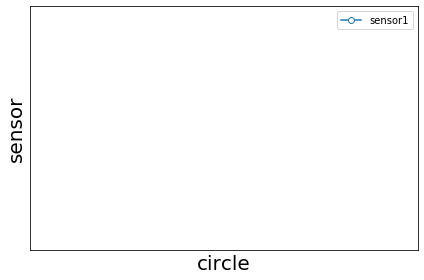

In [4]:
n=0
Y=[0 for x in range(len(response['Items']))]  #Y is 
X=[0 for x in range(len(response['Items']))]
for i in response['Items']:
    #y=response['Items'][n]
    Y[n]=float(i['sensor1'])
    X[n]=float(i['circle'])
    print(type(Y))
    n+=1  

plt.plot(X,Y, marker='o', mfc='w',label=u'sensor1')

    # 坐标轴设置：
plt.ylim((518,519))   # y取值范围
plt.xlabel('circle',fontsize=20)  # x标签
plt.ylabel('sensor',fontsize=20)  # y标签
plt.xticks(X, rotation=45)
plt.yticks(Y)
plt.legend()  #让图例生效
plt.tight_layout()
plt.show()
    

In [3]:
x=[0 for x in range(len(response['Items']))]
y = [[0 for i in range(21)] for j in range(len(response['Items']))]
for i in range(1, 22):
    for j in range(len(response['Items'])):
        y[j][i-1] = response['Items'][j]['sensor'+str(i)]
print(y)

[['449.44', '555.32', '1358.61', '1137.23', '5.48', '8.00', '194.64', '2222.65', '8341.91', '1.02', '42.02', '183.06', '2387.72', '8048.56', '9.3461', '0.02', '334', '2223', '100.00', '14.73', '8.8071'], ['445.00', '549.90', '1353.22', '1125.78', '3.91', '5.71', '138.51', '2211.57', '8303.96', '1.02', '42.20', '130.42', '2387.66', '8072.30', '9.3774', '0.02', '330', '2212', '100.00', '10.41', '6.2665'], ['462.54', '537.31', '1256.76', '1047.45', '7.05', '9.02', '175.71', '1915.11', '8001.42', '0.94', '36.69', '164.22', '2028.03', '7864.87', '10.8941', '0.02', '309', '1915', '84.93', '14.08', '8.6723'], ['445.00', '549.51', '1354.03', '1126.38', '3.91', '5.71', '138.46', '2211.58', '8303.96', '1.02', '41.96', '130.72', '2387.61', '8068.66', '9.3528', '0.02', '329', '2212', '100.00', '10.59', '6.4701'], ['462.54', '537.07', '1257.71', '1047.93', '7.05', '9.03', '175.05', '1915.10', '7993.23', '0.94', '36.89', '164.31', '2028.00', '7861.23', '10.8963', '0.02', '309', '1915', '84.93', '14.

<class 'list'>


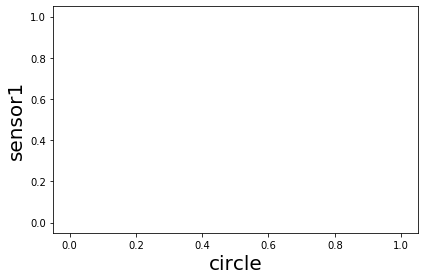

<class 'list'>


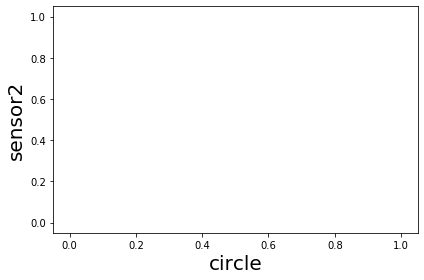

<class 'list'>


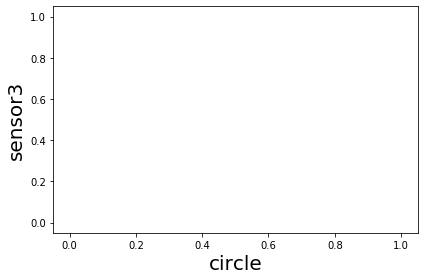

<class 'list'>


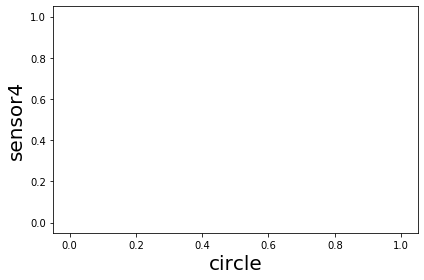

<class 'list'>


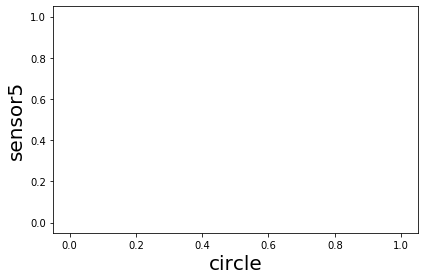

<class 'list'>


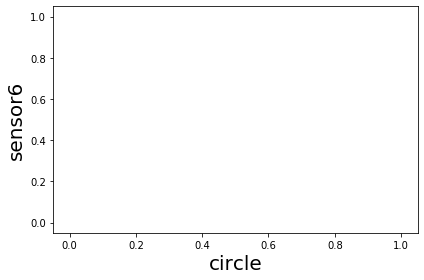

<class 'list'>


KeyboardInterrupt: 

In [6]:
for s in range (1,22): #there is a total of 21 sensors
    n=0
    Y=[0 for x in range(len(response['Items']))] # Y is the list for each sensor value
    X=[0 for x in range(len(response['Items']))] # X is the list for circle
    for i in response['Items']:
        #y=response['Items'][n]
        Y[n]=float(i['sensor%d'%s])
        X[n]=float(i['circle'])
        print(Y)
        n+=1

    plt.plot(X,Y)

        # set axis
    plt.xlabel('circle',fontsize=20)  # x label
    plt.ylabel('sensor%d'%s,fontsize=20)  # y label
    plt.tight_layout()
    plt.show()

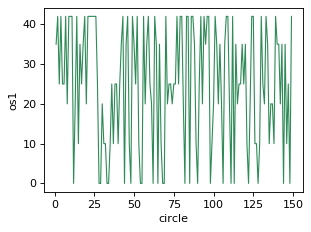

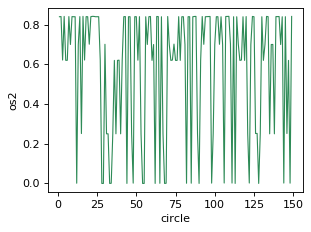

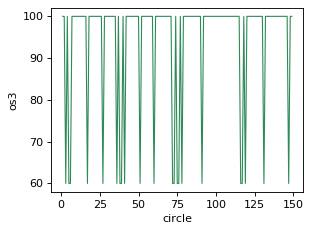

In [19]:
for t in range (1,4):  # a total of 3 operational settings
    n=0
    Y=[0 for x in range(len(response['Items']))] #Y is the list for os values
    X=[0 for x in range(len(response['Items']))] #X is the list for circle
    for i in response['Items']:
        #y=response['Items'][n]
        Y[n]=float(i['os%d'%t])
        X[n]=float(i['circle'])
        #print(Y)
        n+=1

    plt.figure(figsize=(4,3),dpi=80)
    plt.plot(X,Y,color='seagreen',linewidth=1)

        # set axis：
    plt.xlabel('circle')  # x label
    plt.ylabel('os%d'%t)  # y label
    plt.tight_layout()
    plt.show()